# Embedded ML - Lab 2.1: TensorFlow

In this lab you will learn the basics of one of the most developed and widely used ML libraries: TensorFlow. It implements many of the most important ML models and algorithms and has optimized back-ends for efficient execution on CPUs, GPUs, TPUs and other devices.

In this lab you are given some helper functions but you are expected to write most of the code and be able to explain it at a high level of abstraction and also to modify any part of it. This lab is important because a significant part of the course will use TensorFlow.

### Learning outcomes


* Explain the basic concepts associated with TensorFlow
* Use the basic workflow of TensorFlow to build a simple ML model
* Implement simple dense networks with TensorFlow and Keras
* Use some of the input handling functions of TensorFlow
* Implement a simple CNN with TensorFlow and Keras
* Implement transfer learning and fine tuning.

### TensorFlow workflow
As in general with ML, in TensorFlow you have to get or preprocess the model inputs, train the model, run inference and evaluate results.

Here you should use TensorFlow to build a dense 4-layer network to classify items in the FASHION MNIST dataset. Explore a few different hidden-layer sizes and report the accuracy achieved.

Finally, investigate how to export the model to a file and write a separate code that is able to load that model and run inference again.

In [ ]:
import os
import sys
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt

# Load the dataset FASHION-MNIST from TensorFlow Datasets
def load_data():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
    # Segment the dataset into training and testing sets
    x_train, y_train = x_train[:600], y_train[:600]
    x_test, y_test = x_test[:60], y_test[:60]
    x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
    x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

    return (x_train, y_train), (x_test, y_test)



# Pre-process input dataset
def preprocess_data(x_train, y_train, x_test, y_test):
    # Normalize the data
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train.reshape(-1, 28*28)).reshape(-1, 28, 28, 1)
    x_test = scaler.transform(x_test.reshape(-1, 28*28)).reshape(-1, 28, 28, 1)
    
    # Split the training data into training and validation sets
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
    
    return (x_train, y_train), (x_val, y_val), (x_test, y_test)

# Create the model
def create_model(h1idden_units=128, h2_hidden_units=64, h3_hidden_units=32, h4_hidden_units=16):
    """Create a simple ANN model for classification With 28*28 input shape, 10 classes and 4 hidden layers"""
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))
    model.add(layers.Dense(h1idden_units, activation='relu'))
    model.add(layers.Dense(h2_hidden_units, activation='relu'))
    model.add(layers.Dense(h3_hidden_units, activation='relu'))
    model.add(layers.Dense(h4_hidden_units, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    return model

# Compile the model
def compile_model(model):
    """Compile the model with Adam optimizer and sparse categorical crossentropy loss"""
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the model
def train_model(model, x_train, y_train, x_val, y_val):
    """Train the model with simple method"""
    history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_val, y_val), verbose=1)
    return history

# Evaluate functional performance
def evaluate_model(model, x_test, y_test):
    """Evaluate the model on the test set"""
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f'Test accuracy: {test_acc}')
    
    # Generate classification report
    y_pred = np.argmax(model.predict(x_test), axis=1)
    print(classification_report(y_test, y_pred))
    
    # Generate confusion matrix and plot it
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, range(10))
    plt.yticks(tick_marks, range(10))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    

# Save the model to a file
def save_model(model, model_path):
    """Save the model to a file"""
    model.save(model_path)
    print(f'Model saved to {model_path}')



Loaded 600 training samples and 60 testing samples.
Pre-processed data: (480, 28, 28, 1), (480,), (120, 28, 28, 1), (120,), (60, 28, 28, 1), (60,)
Model compiled.
Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2783 - loss: 2.0220 - val_accuracy: 0.6083 - val_loss: 1.2134
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7078 - loss: 0.9526 - val_accuracy: 0.7500 - val_loss: 0.8056
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8065 - loss: 0.6251 - val_accuracy: 0.7917 - val_loss: 0.6631
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8771 - loss: 0.4325 - val_accuracy: 0.8000 - val_loss: 0.6307
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9246 - loss: 0.2732 - val_accuracy: 0.8417 - val_loss: 0.5387
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9499 - loss: 0.1897 - val_accuracy: 0.8167 - val_loss: 0.5756
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9702 - lo

Model trained.
Model saved to fashion_mnist_model.h5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7278 - loss: 1.2084
Test accuracy: 0.7166666388511658
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      1.00      1.00         7
           2       0.71      0.62      0.67         8
           3       1.00      0.60      0.75         5
           4       0.62      0.62      0.62         8
           5       0.67      0.40      0.50         5
           6       0.38      0.60      0.46         5
           7       0.67      0.57      0.62         7
           8       0.86      0.86      0.86         7
           9       0.67      1.00      0.80         4

    accuracy                           0.72        60
   macro avg       0.74      0.73      0.72        60
weighted avg       0.74      0.72      0.72        60



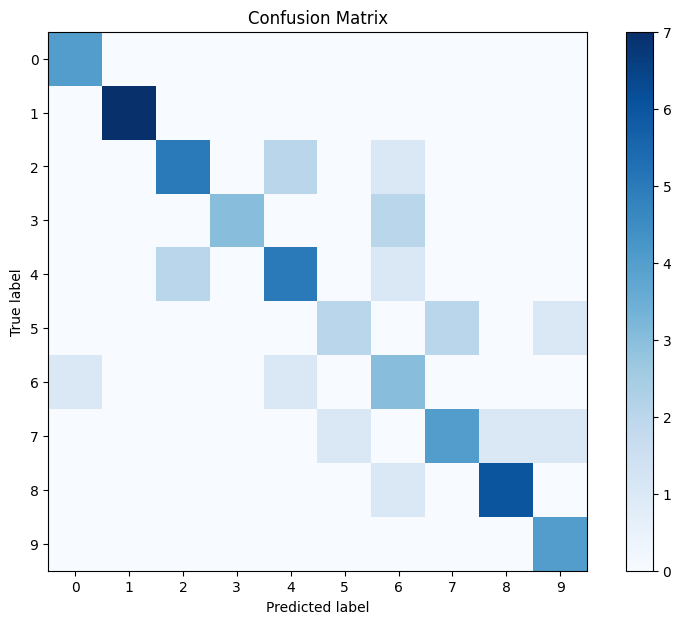

In [ ]:
# Instantiate model
topology = {
    'model0' : [128, 64, 32, 16],
    'model1' : [256, 128, 64, 32],
    'model2' : [512, 256, 128, 64],
    'model3' : [1024, 512, 256, 128],
}

model0 = create_model(*topology['model0'])
model1 = create_model(*topology['model1'])
model2 = create_model(*topology['model2'])
model3 = create_model(*topology['model3'])

models = [model0, model1, model2, model3]

# Load the saved model
model_path = 'fashion_mnist_model.h5'

# Load the dataset
(x_train, y_train), (x_test, y_test) = load_data()

print(f"Loaded {len(x_train)} training samples and {len(x_test)} testing samples.")

# Pre-process the data
(x_train, y_train), (x_val, y_val), (x_test, y_test) = preprocess_data(x_train, y_train, x_test, y_test)

print(f"Pre-processed data: {x_train.shape}, {y_train.shape}, {x_val.shape}, {y_val.shape}, {x_test.shape}, {y_test.shape}")

# Compile the models
for model in [model0, model1, model2, model3]:
    model = compile_model(model)
    print(f"Model {model} compiled.")

print("Model compiled.")

# Train the model
history = train_model(model, x_train, y_train, x_val, y_val)

print("Model trained.")

# Save the model
save_model(model, model_path)


# Verify functional performance
evaluate_model(model, x_test, y_test)

### CNNs with TensorFlow
Convolutional Neural Networks add another type of processing layers to extract image features that allow the model to indentify patterns for a much better accuracy results in computer vision applications.

Implement a CNN model to classify the FASHION MNIST dataset and compare the accuracy results with the previous dense model. Also report a comparison of the model size measuring the saved model file size and through an analytical estimation.

In [6]:
# Pre-process input dataset

# Create the CNN model

# Compile the CNN model

# Train the model

# Evaluate functional performance

# Save the model to a file

### Transfer learning and fine tuning
When you want to build a model but do not have enough data or resources to train a network with the accuracy you need, it possible to use a model that has been pre-trained on a large dataset and fine tune it with the target (smaller) dataset to solve the target classification problem.

Here you should use TensorFlow and Keras to download a pre-trained vision model from TensorFlow Hub (e.g. MobileNet V2), add a softmax classification layer and train it with a small subset of the Fashion MNIST dataset.

Compare runtimes and Top-1 accuracy of the resulting model with the dense and convolutional models previously built.



In [7]:
# download the pre-trained model and create a Keras meta-layer

# build a new model adding a softmax layer

# compile and train the new model